In [67]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
df = pd.read_csv('C:/Users/bhamp/Documents/GitHub/ASU_Applied_Project_2021/Text analytics/outputnaeun.csv')
# Print head
df.head()

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MsgID,Timestamp,Author,ThreadID,ThreadTitle,MsgBody,ReplyTo,Permalink
0,'grd7uya','2021-03-18 15:57:53','radhumandummy','m7sm9j','everything was perfect✨ (210318)','https://www.instagram.com/p/CMkDC3ohi5I/ htt...,'-','/r/naeun/comments/m7sm9j/everything_was_perfe...
1,'gqfjqx9','2021-03-10 11:15:14','radhumandummy','m1ue5q','My favorite time of the day☀️ (210310)','https://www.instagram.com/p/CMO_LWTh3i_/','-','/r/naeun/comments/m1ue5q/my_favorite_time_of_...
2,'gpixfqk','2021-03-03 13:07:20','radhumandummy','lwsd3r','Untitled photos (210303)','https://www.instagram.com/p/CL9KI8uhkkG/ htt...,'-','/r/naeun/comments/lwsd3r/untitled_photos_2103...
3,'gnnnhs2','2021-02-16 16:50:36','radhumandummy','ll6n04','🎂 (210217)','https://www.instagram.com/p/CLW8KYQBYqW/ htt...,'-','/r/naeun/comments/ll6n04/210217/gnnnhs2/'
4,'gnd3r0a','2021-02-14 07:11:14','radhumandummy','ljivn0','#FendiMoonlight #Fendi @Fendi (210214)','https://www.instagram.com/p/CLQwBcFBbyR/','-','/r/naeun/comments/ljivn0/fendimoonlight_fendi...


In [68]:
# Remove the columns
df= df.drop(columns=['MsgID', 'Timestamp', 'Author','ThreadID' , 'ThreadTitle' ,'ReplyTo'  ,'Permalink'], axis=1).sample(100)        
# Print out the first rows of papers
df.head()


C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MsgBody
94,'https://www.instagram.com/p/B-7cJ0lBarw/ htt...
243,'https://www.instagram.com/p/BfToGwfAufX/ htt...
172,'https://www.instagram.com/p/BqCku39BQdF/ htt...
348,'Missed the date.'
312,'kawaii'


In [69]:
df['patterns'] = df.MsgBody
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import string
from textblob import Word
import re

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhamp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhamp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
stop = stopwords.words('english')
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x.lower() for x in x.split()))
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x for x in x.split() if x not in string.punctuation)) #remove punctuations
df['patterns'] = df['patterns'].str.replace('https*\S+','')  #remove url
df['patterns'] = df['patterns'].str.replace('\'\w+','')      #remove ticks
df['patterns'] = df['patterns'].str.replace('[^\w\s]','')    
df['patterns'] = df['patterns'].str.replace('@\S+','')       #remove email
df['patterns'] = df['patterns'].str.encode('ascii', 'ignore').str.decode("utf-8")  #remove unicode
df['patterns'] = df['patterns'].str.replace('\w*\d+\w*','')  #remove digits
df['patterns'] = df['patterns'].str.replace('#\S+','')  #remove hashtag
df['patterns'] = df['patterns'].str.replace('_','')  #remove underscore
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x for x in x.split() if  not x.isdigit()))
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x for x in x.split() if not x in stop)) #remove stop words
df['patterns'] = df['patterns'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \S
<>:5: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \S
<>:5: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \S
<ipy

In [63]:
import sys
print(sys.executable)

C:\Users\bhamp\anaconda3\python.exe


C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
!C:/Users/bhamp/anaconda3/python -m pip install wordcloud

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


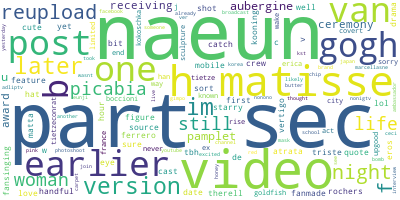

In [71]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['patterns'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [16]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [72]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df['patterns'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhamp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[]


In [73]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[]


C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.058*"yesterday" + 0.058*"japan" + 0.058*"mask" + 0.058*"gimpo" + '
  '0.058*"ver" + 0.058*"marcellasne" + 0.005*"likely" + 0.005*"later" + '
  '0.005*"source" + 0.005*"date"'),
 (1,
  '0.031*"school" + 0.031*"pamplet" + 0.031*"could" + 0.031*"already" + '
  '0.031*"cast" + 0.031*"post" + 0.031*"wasnt" + 0.031*"took" + '
  '0.031*"someone" + 0.031*"catch"'),
 (2,
  '0.008*"later" + 0.008*"source" + 0.008*"marcellasne" + 0.008*"date" + '
  '0.008*"likely" + 0.008*"version" + 0.008*"nonono" + 0.008*"earlier" + '
  '0.008*"fanmade" + 0.008*"bit"'),
 (3,
  '0.076*"video" + 0.039*"naeun" + 0.039*"ceremony" + 0.039*"award" + '
  '0.039*"receiving" + 0.039*"version" + 0.039*"later" + 0.020*"would" + '
  '0.020*"broadcast" + 0.020*"youtube"'),
 (4,
  '0.037*"one" + 0.034*"matisse" + 0.026*"brand" + 0.026*"join" + '
  '0.026*"ambassador" + 0.026*"photoshoot" + 0.026*"limited" + 0.026*"eunji" + '
  '0.026*"earlier" + 0.026*"date"'),
 (5,
  '0.008*"later" + 0.008*"source" + 0.008*"nonono

In [20]:
conda update anaconda

Solving environment: ...working... 
  - defaults/noarch::sphinx-3.5.4-pyhd3eb1b0_0, defaults/win-64::docutils-0.16-py38_1
  - defaults/noarch::sphinx-3.2.1-py_0, defaults/win-64::docutils-0.17-py38haa95532_1done

## Package Plan ##

  environment location: C:\Users\bhamp\anaconda3

  added / updated specs:
    - anaconda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    sphinx-3.5.4               |     pyhd3eb1b0_0         1.1 MB
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following packages will be UPDATED:

  sphinx                                         3.2.1-py_0 --> 3.5.4-pyhd3eb1b0_0

The following packages will be DOWNGRADED:

  docutils                              0.17-py38haa95532_1 --> 0.16-py38_1




sphinx-3.5.4         | 1.1 MB    |            |   0% 
sphinx-3.5.4         | 1.1 MB   

In [21]:
!python -m pip install -U pyLDAvis



In [22]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [39]:
from collections import Counter

# Counter token frequency from a sentence
data = df['patterns']

term_frequencies = Counter(data)

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
newsgroups = df['patterns']
docs_raw = newsgroups
print(len(docs_raw))

100


C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b')
dtm_tf = tf_vectorizer.fit_transform(docs_raw)
print(dtm_tf.shape)

(100, 113)


C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)
print(dtm_tfidf.shape)

(100, 113)


C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\bhamp\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [79]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(random_state=0)

In [80]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.186379  0.090742       1        1  31.002340
4      0.202296  0.064313       2        1  21.773190
6     -0.016335 -0.182881       3        1  12.141801
0     -0.016216  0.012937       4        1   7.651995
8     -0.003049 -0.049618       5        1   7.104369
9      0.035603  0.030967       6        1   5.628178
2     -0.004080  0.005925       7        1   5.134990
1     -0.004556  0.007603       8        1   3.425806
7     -0.002269  0.010925       9        1   3.366287
3     -0.005013  0.009086      10        1   2.771044, topic_info=          Term      Freq     Total Category  logprob  loglift
87         sec  3.000000  3.000000  Default  30.0000  30.0000
68       naeun  2.000000  2.000000  Default  29.0000  29.0000
55       later  1.000000  1.000000  Default  28.0000  28.0000
106      video  3.000000  3.000000  Default  27.0000  27.0000
104    version  1.000000  1.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
57        like  0.027129  0.952694  Topic10  -4.9628   0.0273
77        pink  0.027129  0.952694  Topic10  -4.9628   0.0273
39       gimpo  0.027129  0.952694  Topic10  -4.9628   0.0273
48       japan  0.027129  0.952694  Topic10  -4.9628   0.0273
111  yesterday  0.027129  0.952694  Topic10  -4.9628   0.0273

[444 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.786396        act
1         2  0.838275    adliptv
3         1  0.786396     atrata
4         1  0.965742  aubergine
5         2  1.045177      award
...     ...       ...        ...
108       3  0.950160      wasnt
110       1  0.570770      woman
110       4  0.570770      woman
111       4  1.049655  yesterday
112       2  0.838275    youtube

[86 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 7, 1, 9, 10, 3, 2, 8, 4])

In [81]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

C:\Users\bhamp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.048580 -0.090037       1        1  16.340629
7     -0.031151 -0.007766       2        1  15.667645
8      0.084680  0.073428       3        1  15.027525
9     -0.082435  0.024389       4        1  10.917749
3     -0.017444  0.004620       5        1  10.218206
6     -0.005763 -0.001484       6        1   8.829411
2      0.000272 -0.000745       7        1   6.871450
5     -0.001921 -0.000661       8        1   6.066821
4      0.001838 -0.000914       9        1   5.615787
1      0.003345 -0.000830      10        1   4.444777, topic_info=            Term      Freq     Total Category  logprob  loglift
55         later  0.000000  0.000000  Default  30.0000  30.0000
63   marcellasne  0.000000  0.000000  Default  29.0000  29.0000
68         naeun  0.000000  0.000000  Default  28.0000  28.0000
87           sec  0.000000  0.000000  Default  27.0000  27.0000
72        nonono  0.000000  0.000000  Default  26.0000  26.0000
..           ...       ...       ...      ...      ...      ...
104      version  0.018456  0.784852  Topic10  -4.8122  -0.6367
55         later  0.018456  0.743024  Topic10  -4.8122  -0.5819
78          post  0.018456  0.594530  Topic10  -4.8122  -0.3589
23          date  0.018456  0.667934  Topic10  -4.8122  -0.4754
58        likely  0.018456  0.667934  Topic10  -4.8122  -0.4754

[397 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 9, 10, 4, 7, 3, 6, 5, 2])